In [40]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# load dataset

dataset = keras.datasets.fashion_mnist
((img_train, img_train_identifier), (img_tests, img_tests_identifier)) = dataset.load_data()
name_classifications = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa','Tênis', 'Bolsa', 'Bota']

img_train.shape, img_tests.shape, img_train_identifier.shape, img_tests_identifier.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

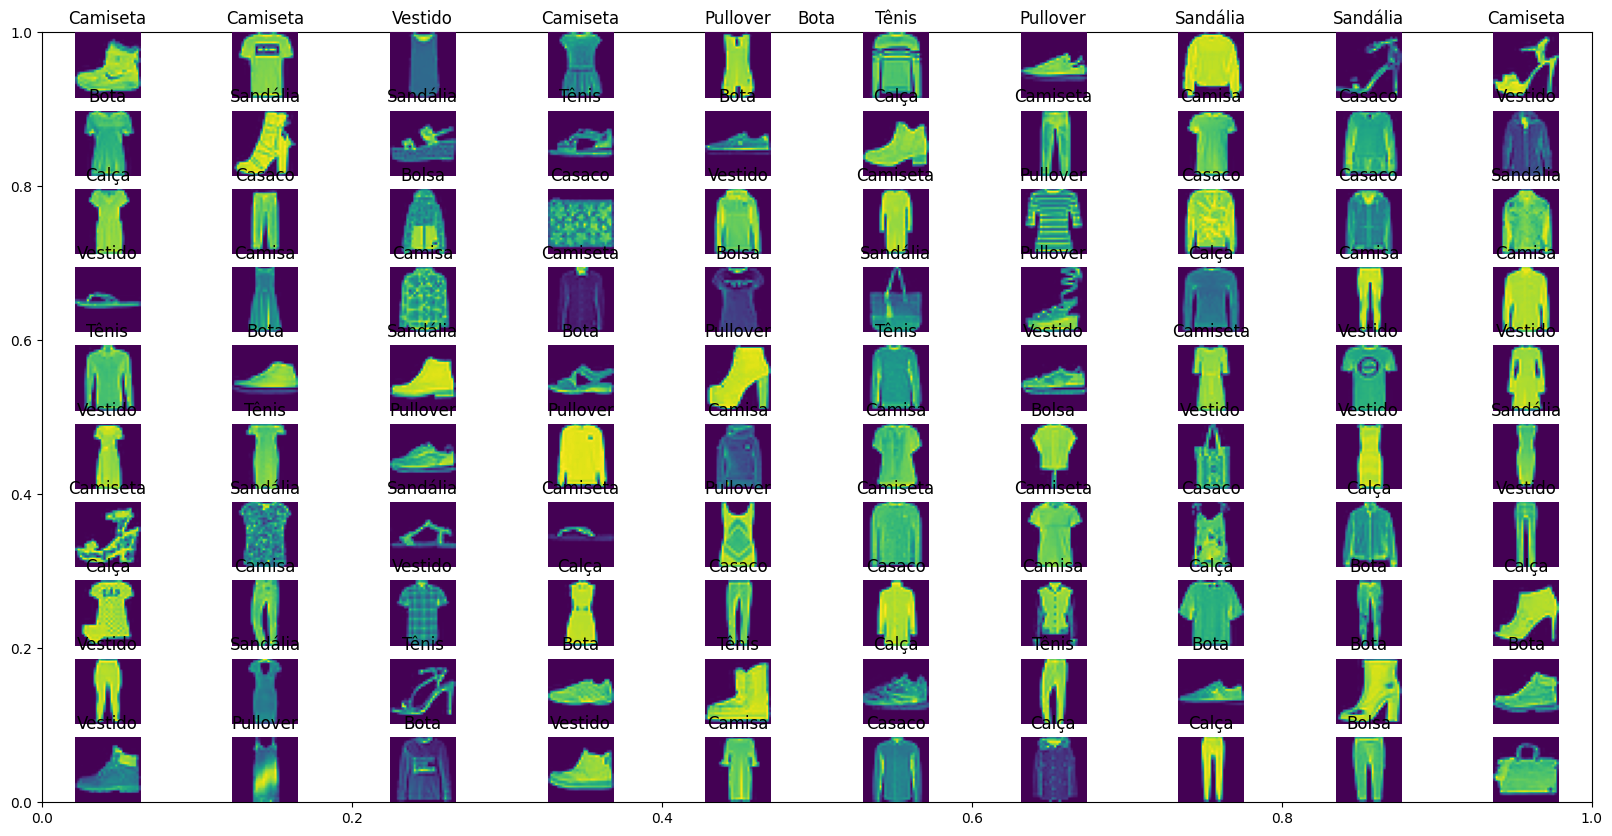

In [42]:
# show images

plt.figure(figsize=(20, 10))
for x in range(100):
    plt.title(f"{name_classifications[img_train_identifier[x]]}")
    plt.subplot(10, 10, x+1)
    plt.imshow(img_train[x])
    plt.axis('off')
plt.show()

# creating model and training

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu), # unit linear rectifier
    keras.layers.Dense(10, activation=tf.nn.softmax) # max of classification, with function softmax
])

model_compile = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy') # entropia categorica cruzada esparsa
model.fit(img_train, img_train_identifier)

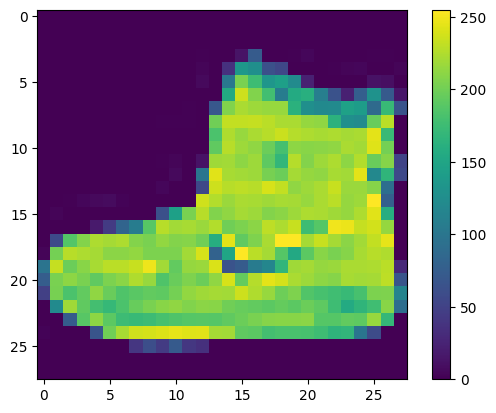

In [43]:
### let check the quality of the model per colors

plt.imshow(img_train[0])
plt.colorbar()

In [44]:
#normalization and training

img_train = img_train / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu), 
    keras.layers.Dropout(0.2), # 20% of the neurons will be disabled
    keras.layers.Dense(10, activation=tf.nn.softmax) 
])

model_compile = model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # entropia categorica cruzada esparsa
historic = model.fit(img_train, img_train_identifier, epochs=5, validation_split=.2)

Epoch 1/5


/home/gregorio/Documentos/PROJETOS/ESTUDOS/KERAS/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7635 - loss: 0.6748 - val_accuracy: 0.8572 - val_loss: 0.3996
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8513 - loss: 0.4061 - val_accuracy: 0.8648 - val_loss: 0.3743
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8679 - loss: 0.3649 - val_accuracy: 0.8673 - val_loss: 0.3552
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8742 - loss: 0.3386 - val_accuracy: 0.8752 - val_loss: 0.3489
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8828 - loss: 0.3202 - val_accuracy: 0.8651 - val_loss: 0.3566


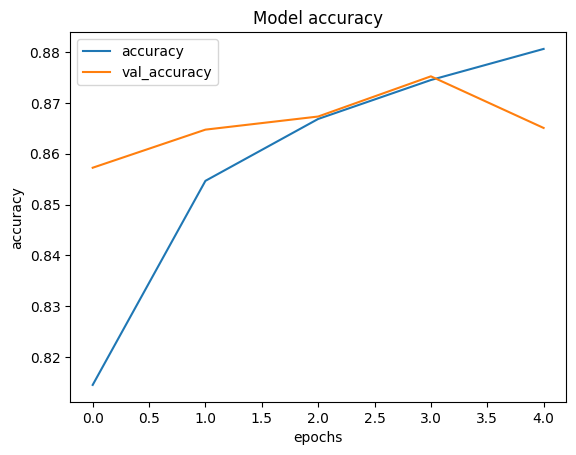

In [45]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy'])

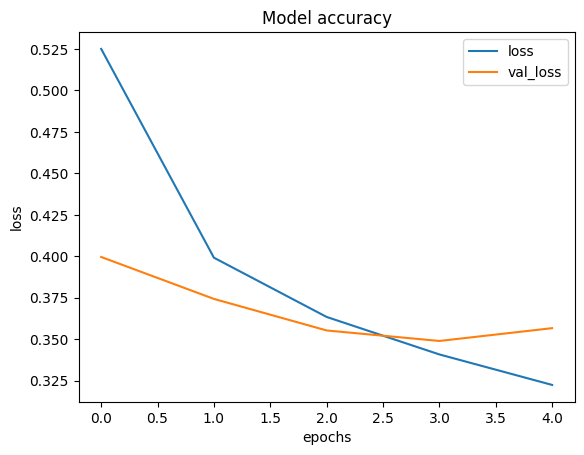

In [46]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])

In [47]:
model.predict(img_tests)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


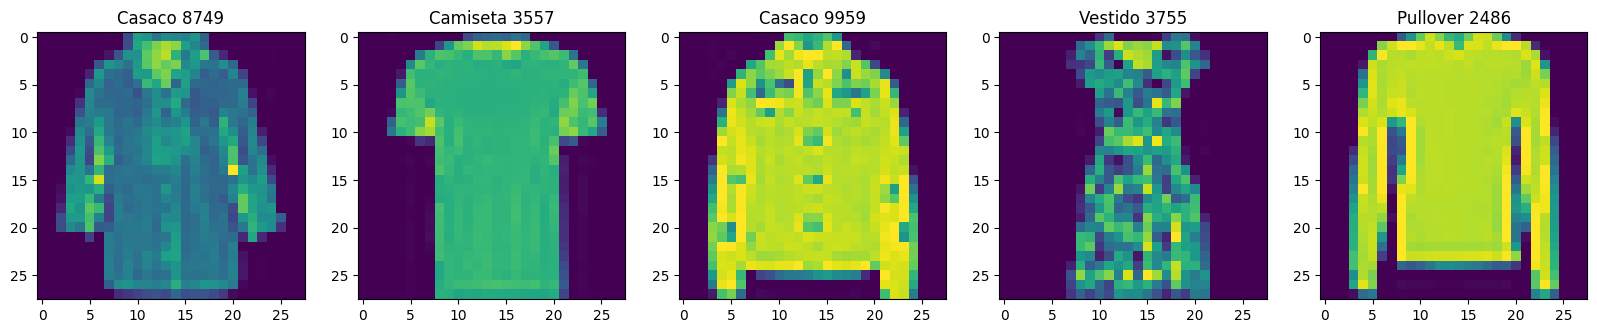

In [60]:
# test model

from random import randint


plt.figure(figsize=(20, 10))
for i in range(5):
    int_choice = randint(0, len(img_tests) - 1)
    img_to_predict = np.expand_dims(img_tests[int_choice], axis=0)
    img_predicted = model.predict(img_to_predict)
    predicted_label = np.argmax(img_predicted[0])
    
    plt.subplot(1, 5, i+1)
    plt.imshow(img_tests[int_choice])
    plt.title(f"{name_classifications[predicted_label]} {int_choice}")

In [ ]:
model.evaluate(img_tests, img_tests_identifier)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.8598 - loss: 48.2435


[51.95365905761719, 0.8575000166893005]

In [ ]:
# save model

model.save('model.h5')

In [ ]:
# load model
from tensorflow.keras.models import load_model


model_save = load_model('model.h5', custom_objects={'softmax_v2': tf.nn.softmax})

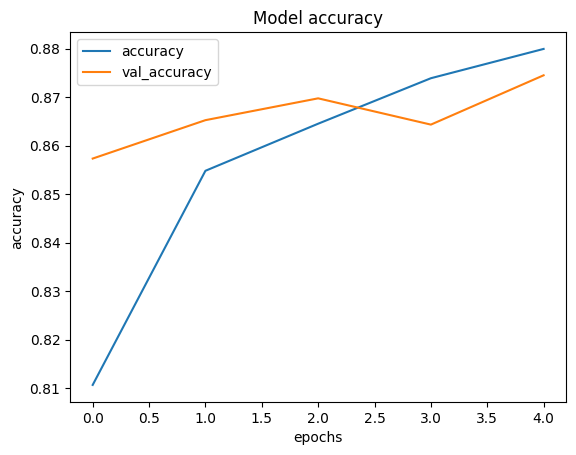

In [ ]:
plt.plot(historic.history['accuracy'])
plt.plot(historic.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy', 'val_accuracy'])

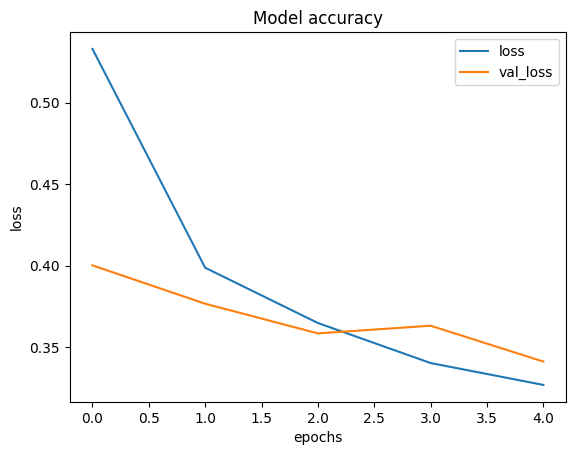

In [ ]:
plt.plot(historic.history['loss'])
plt.plot(historic.history['val_loss'])

plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Bota


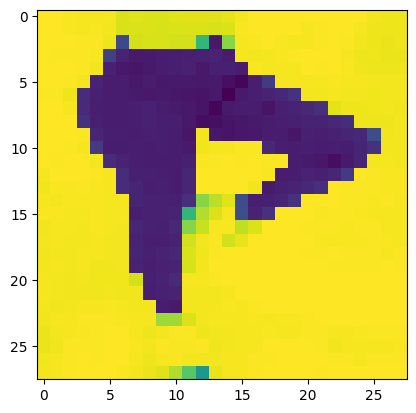

In [81]:
from keras.preprocessing.image import img_to_array, load_img


imagem = load_img('/tmp/1.png', target_size=(28, 28), color_mode='grayscale')
imagem_array = img_to_array(imagem)
imagem_array_expandido = np.expand_dims(imagem_array, axis=0)

result = model.predict(imagem_array_expandido)
index_class = np.argmax(result, axis=1)

print(name_classifications[index_class[0]]) 
plt.imshow(imagem)
plt.show()